# Carregando Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


#Carregando Pacotes

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Parâmetros

In [4]:
#Path base de dados Drive
nome_base = 'oregon_wildlife'
nome_zip = nome_base + '.zip'
dir_path = Path('/content/drive/MyDrive/CI1394/')
zip_path = dir_path/nome_zip

# Tamanho imagem
img_rows, img_cols = 224, 224

input_shape = (img_rows, img_cols, 3)

#Batch size

batch_size = 32

#Carregar Base de Dados

https://www.kaggle.com/virtualdvid/oregon-wildlife

In [5]:
!cp {zip_path} .
!unzip -q {nome_zip}
!rm {nome_zip}

In [6]:
path_train = '/content/' + nome_base + '/train'
path_test = '/content/' + nome_base + '/test'

In [7]:
train_dataset = image_dataset_from_directory(
        path_train,
        image_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=batch_size,
        shuffle=False) #Somente apresentação da base
test_dataset = image_dataset_from_directory(
        path_test,
        image_size=(img_rows, img_cols),
        color_mode="rgb",
        batch_size=batch_size,
        shuffle=False)

Found 3136 files belonging to 14 classes.
Found 784 files belonging to 14 classes.


A base está balanceada entre as classes com 280 imagens para cada classe.

A base foi dividia em 80% para treino e 20% para teste

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg


labels: Either "inferred" (labels are generated from the directory structure), None (no labels), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).


class_names: Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).

In [8]:
classes = train_dataset.class_names
print(classes)

['bald_eagle', 'black_bear', 'bobcat', 'canada_lynx', 'columbian_black-tailed_deer', 'cougar', 'coyote', 'deer', 'gray_wolf', 'raccoon', 'red_fox', 'sea_lions', 'seals', 'virginia_opossum']


In [9]:
classes_dict = dict(enumerate(classes))
print(classes_dict)

{0: 'bald_eagle', 1: 'black_bear', 2: 'bobcat', 3: 'canada_lynx', 4: 'columbian_black-tailed_deer', 5: 'cougar', 6: 'coyote', 7: 'deer', 8: 'gray_wolf', 9: 'raccoon', 10: 'red_fox', 11: 'sea_lions', 12: 'seals', 13: 'virginia_opossum'}


In [10]:
train_dataset.file_paths[:10]

['/content/oregon_wildlife/train/bald_eagle/00e148aeea989ba56b.JPG',
 '/content/oregon_wildlife/train/bald_eagle/019edce49ef404db98.jpg',
 '/content/oregon_wildlife/train/bald_eagle/023396cb25b3c3b42b.jpg',
 '/content/oregon_wildlife/train/bald_eagle/02d1e1ddfce422b881.jpg',
 '/content/oregon_wildlife/train/bald_eagle/037764efc31f00fb1d.jpg',
 '/content/oregon_wildlife/train/bald_eagle/04474682b5a82f6bff.jpg',
 '/content/oregon_wildlife/train/bald_eagle/056c89e037e83fea0b.jpg',
 '/content/oregon_wildlife/train/bald_eagle/05744a7110af55c085.jpg',
 '/content/oregon_wildlife/train/bald_eagle/0599376f745bfe03bf.jpg',
 '/content/oregon_wildlife/train/bald_eagle/05c9c59094cf0f38df.jpg']

In [11]:
np_train = list(train_dataset.unbatch().as_numpy_iterator()) # Passando para uma lista de numpy arrays
np_test = list(test_dataset.unbatch().as_numpy_iterator())
y_train= [y for x, y in np_train] # y para extração de uma imagem de cada classe
y_test= [y for x, y in np_test]

# Visualizando base de Treinamento




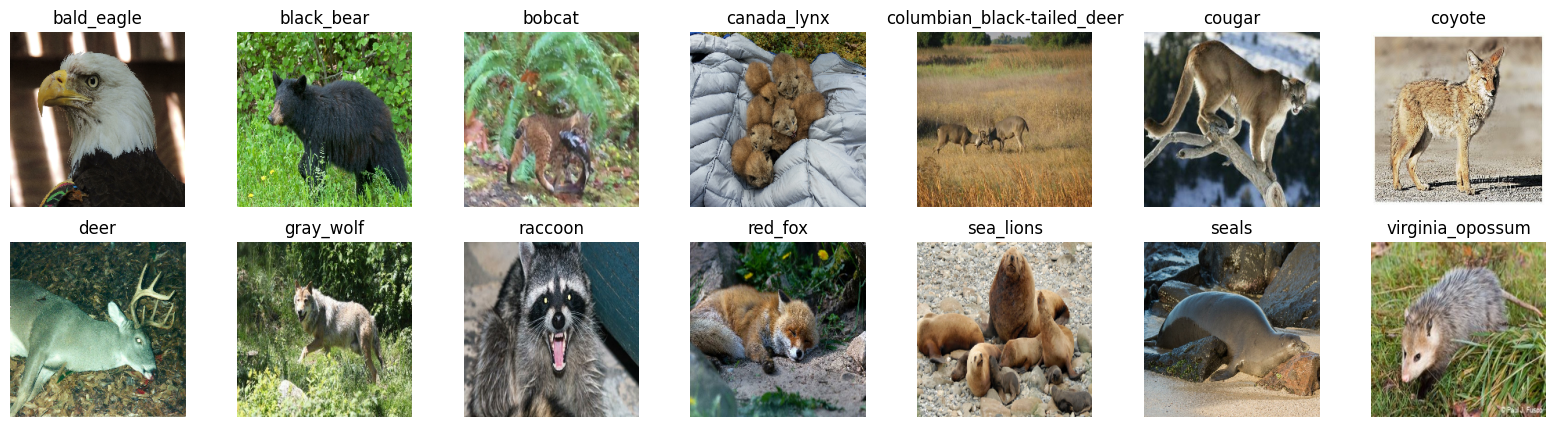

In [12]:
plt.figure(figsize=(20, 5))
for index in range(14):
  index_y = y_train.index(index)
  image, label = np_train[index_y]
  ax = plt.subplot(2, 7, index + 1)
  plt.imshow(image.astype("uint8"))
  plt.title(classes[label])
  plt.axis("off")

# Visualizando base de Teste

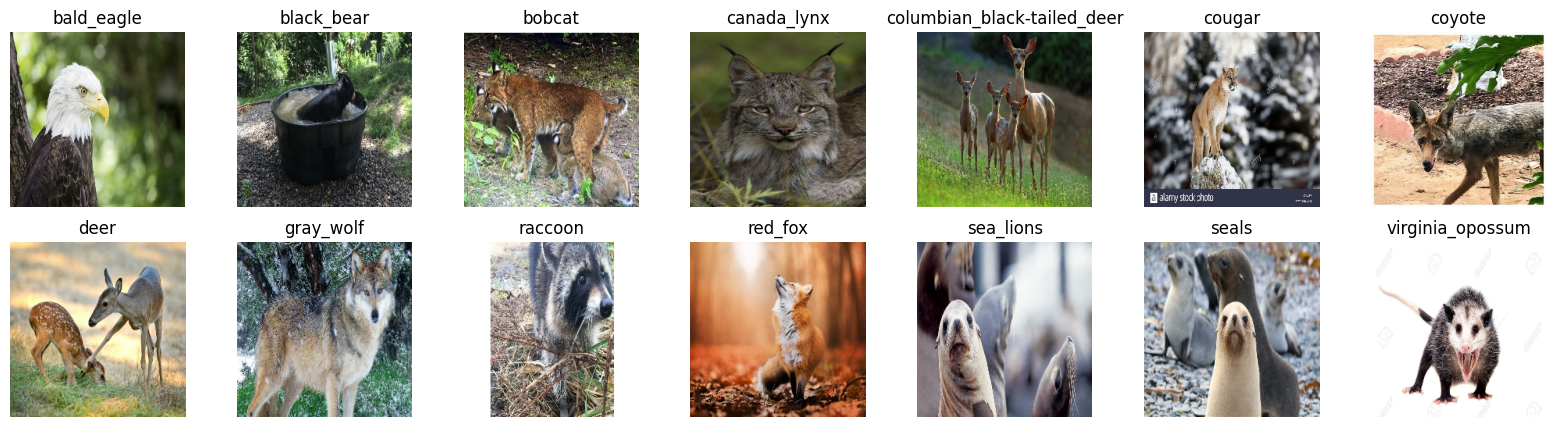

In [13]:
plt.figure(figsize=(20, 5))
for index in range(14):
  index_y = y_test.index(index)
  image, label = np_test[index_y]
  ax = plt.subplot(2, 7, index + 1)
  plt.imshow(image.astype("uint8"))
  plt.title(classes[label])
  plt.axis("off")